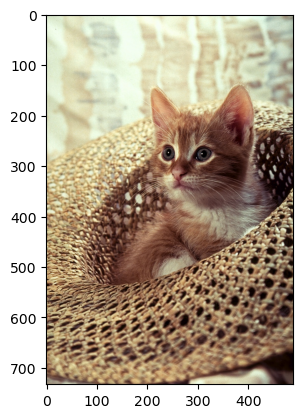

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
imageCat = mpimg.imread('C:/Users/ktang28/ML_MiniProjects/ImageCompression/cat.png')

# Display the image
plt.imshow(imageCat)
plt.show()

In [6]:
#Re-organize the pixels as a 2D array with dimensions (number of pixels, 3)
imageCat.shape


(733, 490, 3)

In [8]:
height, width, channels = imageCat.shape
pixels = imageCat.reshape(height * width, 3)

print(pixels.shape)
print(pixels) 

(359170, 3)
[[0.7372549  0.7882353  0.72156864]
 [0.8666667  0.91764706 0.84705883]
 [0.83137256 0.8862745  0.79607844]
 ...
 [0.34117648 0.26666668 0.23921569]
 [0.38039216 0.30588236 0.2784314 ]
 [0.2627451  0.22745098 0.23137255]]


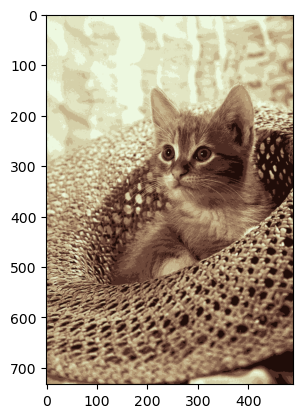

In [10]:
# Perform K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(pixels)

new_pixels = kmeans.cluster_centers_[kmeans.labels_]
new_image = new_pixels.reshape(height, width, channels)

plt.imshow(new_image)
plt.show()

In [12]:
import numpy as np
new_image = np.clip(new_image, 0, 1)

new_image = (new_image * 255).astype(np.uint8)

In [14]:
# Save the new image
from skimage import io
io.imsave('clustered_new_image.jpg', new_image)

In [ ]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift(bin_seeding=True)
mean_shift.fit(pixels)

In [ ]:
mean_new_pixels = mean_shift.cluster_centers_[mean_shift.labels_]

In [ ]:
# Reshape the 2D array back to the original image dimensions
mean_new_image = mean_new_pixels.reshape(height, width, 3)

plt.imshow(mean_new_image)
plt.show()